# Barrera Logarítmica

La barrera logaritmica es un metodo de optimizacion de punto interior que permite incluir las restricciones en una nueva funcion objetivo.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

Problema ejemplo de las diapositivas
$$
\begin{array}{cl}\underset{x}{\operatorname{minimizar}} & x \\ \text { sujeto a } & x \geq 0 \\ &   x \leq 1
\end{array}
$$
El problema anterior expresado a partir de la metodologia de la barrera logaritmica se transforma en
$$
\underset{x}{\operatorname{minimizar}}\  Q(x,u) = x -u(\log(x)+\log(1-x))
$$
donde $u$ es un parámetro que cada vez se vuelve más pequeño y nos permite acercanos más a los limites de las restricciones. Precaución: Debido a la barrera logarítmica, la $x$ no puede evaluarse en los límites de la restricciones porque el valor de la función se vuelve infinito.

(0.0, 4.0)

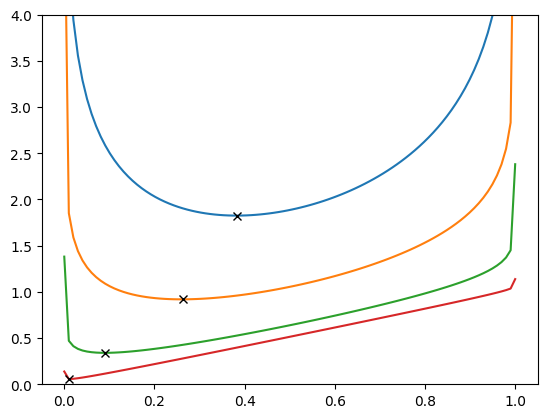

In [4]:
#Observar que no incluimos los extremos 0 o 1, ya que el logaritmo se vuelve inf
tol = 1e-6
x = np.linspace(0+tol,1-tol,100) #Agregamos tolerancias para no incluir los valores extremos
P = lambda x,u: x-u*(np.log(x)+np.log(1.-x))

for u in [1,0.4,0.1,0.01]:
  curva = P(x,u) #calculamos la curva para todos los x
  idx = np.argmin(curva) #buscamos el indice del maximo
  plt.plot(x,curva)
  plt.plot(x[idx],curva[idx],'kx')

plt.ylim([0,4])

Vemos que cuando vamos reduciendo en valor de $u$, nos podemos acercar mas a los valores limite de las restricciones, y en este caso debemos acercanos al limite ya que el mínimo está en el límite cuando $x=0$. <br>

* Ejercicio: Que pasa si en la función objetivo es $x^{10}$?, analizar este caso.


## Problema: Minizar la siguiente función con restricciones
$$
\begin{array}{cl}\underset{\mathbf{x}}{\operatorname{minimizar}} & x_1^2+(x_2-0.2)^2 \\ \text { subject to } & x_1,x_2 \geq 0 \\ &   x_1,x_2 \leq 1
\end{array}
$$

El problema anterior expresado a partir de la metodologia de la barrera logaritmica se transforma en
$$
\underset{x}{\operatorname{minimizar}}\  Q(x,u) = x_1^2+(x_2-0.2)^2 -u(\log(x_1)+\log(1-x_1)+\log(x_2)+\log(1-x_2))
$$

In [5]:
P = lambda x,u: x[0]**2+(x[1]-0.2)**2-u*(np.log(x[0])+np.log(1-x[0])+np.log(x[1])+np.log(1-x[1]))

Agregamos una tolerancia para que dentro de las posibles soluciones dentro del espacio de busqueda del algoritmo de minimización se acerque a los límites sin llegar a ellos. Que pasa si $x_1=1$ o $x_2=0$? Por qué es necesaria la tolerancia?

In [ ]:
tol = 1e-12 #Tolerancia para acercarse a los limites de las desigualdades
x0 = np.array([0.6,0.6])
for u in [1,0.4,0.1,0.01,1e-3,1e-5,1e-8]:
  res = minimize(P, x0=x0, args = (u,), method='L-BFGS-B', bounds=((0.+tol,1.-tol),(0.+tol,1.-tol)))
  x0 = res.x.copy()
  print(res.x,res.fun)

[0.40303167 0.44067757] 3.045462548800636
[0.323231   0.38823241] 1.3228566251158471
[0.19470829 0.29713295] 0.3892427885789139
[0.06807879 0.21669398] 0.05022438616561643
[0.02210627 0.20183842] 0.006152047260675001
[0.00223267 0.20001416] 8.437822214549285e-05
[7.34953544e-05 2.00000011e-01] 1.1891100003199218e-07


In [6]:
x0 = np.array([0.6,0.6])
u = 1e-8
res = minimize(P, x0=x0, args = (u,), method='L-BFGS-B', bounds=((0.+tol,1.-tol),(0.+tol,1.-tol)))
print(res.x,res.fun)

[1.10301374e-04 1.99981228e-01] 1.2196936263887705e-07


* Por que el valor de $u$ debe decrecer? que se logar cuando el valor de $u$ es muy grande? Que ocurre cuando el valor de $u$ es muy pequeño?
* Segun lo visto en los ejemplos anteriores, cual deberían ser los criterios de parada para el método de barrera logarítmica?